In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
import torch

In [2]:
df = pd.read_csv("../Jupyter Notebooks/Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Exploratory Data Analysis

In [4]:
df['Score'].value_counts().sort_index()

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

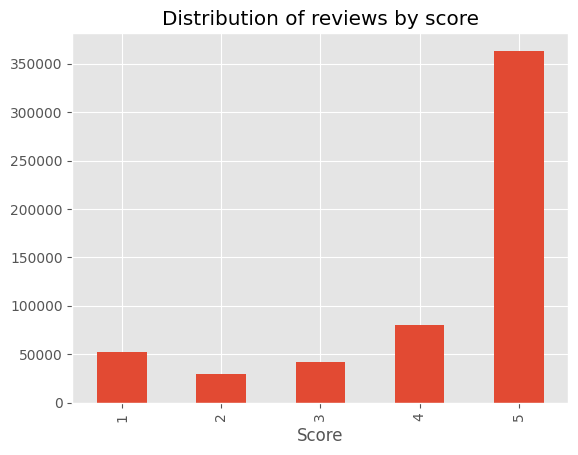

In [5]:
df['Score'].value_counts().sort_index().plot(kind = 'bar',
                                            title = 'Distribution of reviews by score',
                                             xlabel = 'Score') 
plt.show()

## Basic NLTK

In [6]:
example = df['Text'][0]
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food']

In [8]:
nltk.pos_tag(tokens[:10])

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN')]

# VADER Sentiment Scoring

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import notebook

In [10]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df['Text'][20])

{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6249}

In [11]:
df = df[:500]

In [12]:
result = {}

for index, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)

In [13]:
result

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [14]:
vader = pd.DataFrame(data = result).T

In [15]:
vader = vader.reset_index()
vader

,index,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [16]:
vaders = df.merge(vader, left_on = 'Id', right_on = 'index')
vaders

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,index,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,3,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,4,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,496,0.000,0.554,0.446,0.9725
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,497,0.059,0.799,0.142,0.7833
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,498,0.025,0.762,0.212,0.9848
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",499,0.041,0.904,0.055,0.1280


# Plot of Compound Score by Amazon Reviews

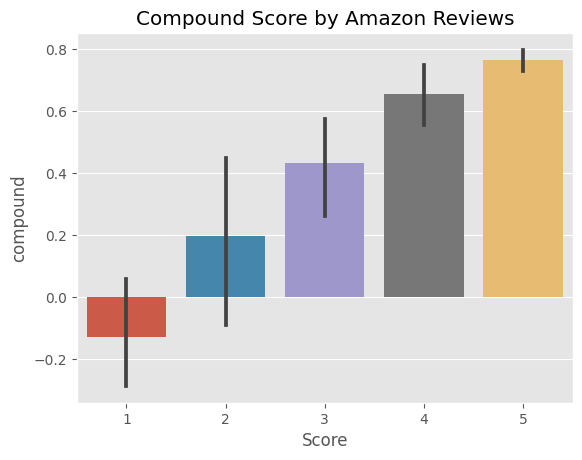

In [17]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Reviews')
plt.show()

# Comparison of Negative, Positive and Neutral Plots

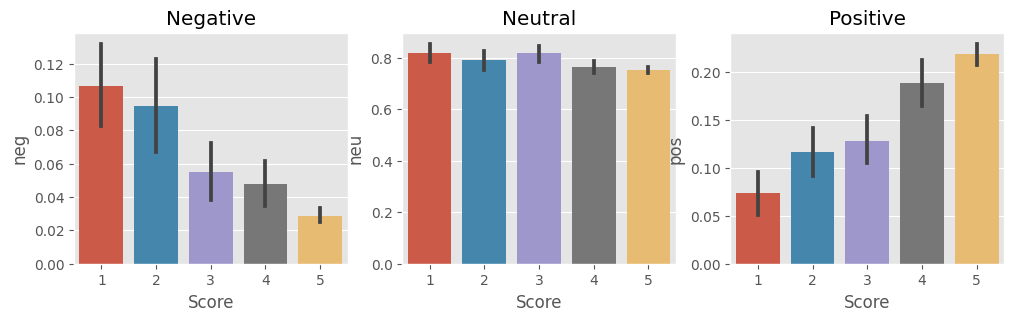

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show()

# Roberta Pretrained Model

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
# Run for Roberta Model
example = df['Text'][5]
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)

# This step is important to convert from torch.Tensor type to numpy.ndarray type
scores = output[0][0].detach().numpy()
scores = softmax(scores) # to normalize it such that the sum of the scores in the array = 1
scores_dict = {'neg': scores[0],
               'neu': scores[1],
               'pos': scores[2]
}

In [22]:
example

'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'

In [23]:
scores_dict

{'neg': 0.0061295666, 'neu': 0.021795806, 'pos': 0.97207457}

In [24]:
# Run for every single review in the dataframe
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)

    # This step is important to convert from torch.Tensor type to numpy.ndarray type
    scores = output[0][0].detach().numpy()
    scores = softmax(scores) # to normalize it such that the sum of the scores in the array = 1
    scores_dict = {'roberta_neg': scores[0],
                   'roberta_neu': scores[1],
                   'roberta_pos': scores[2]
    }
    return scores_dict

In [25]:
polarity_scores_roberta(example)

{'roberta_neg': 0.0061295666,
 'roberta_neu': 0.021795806,
 'roberta_pos': 0.97207457}

In [26]:
result = {}

for index, row in df.iterrows():
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        result[myid] = both
    except RuntimeError:
        print(f"This broke for {myid}")

This broke for 83
This broke for 187


In [29]:
# result = pd.DataFrame(result).T
# result = result.reset_index()
results_df = vaders.merge(result, left_on = 'Id', right_on = 'index')
results_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,pos,compound,index_y,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,0.305,0.9441,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0.000,-0.5664,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,0.155,0.8265,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,0.000,0.0000,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,0.448,0.9468,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,...,0.446,0.9725,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232
494,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,...,0.142,0.7833,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369
495,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,...,0.212,0.9848,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036
496,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",...,0.055,0.1280,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020


## Compare scores between models (using seaborn)

In [31]:
results_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'index_x',
       'neg', 'neu', 'pos', 'compound', 'index_y', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],
      dtype='object')

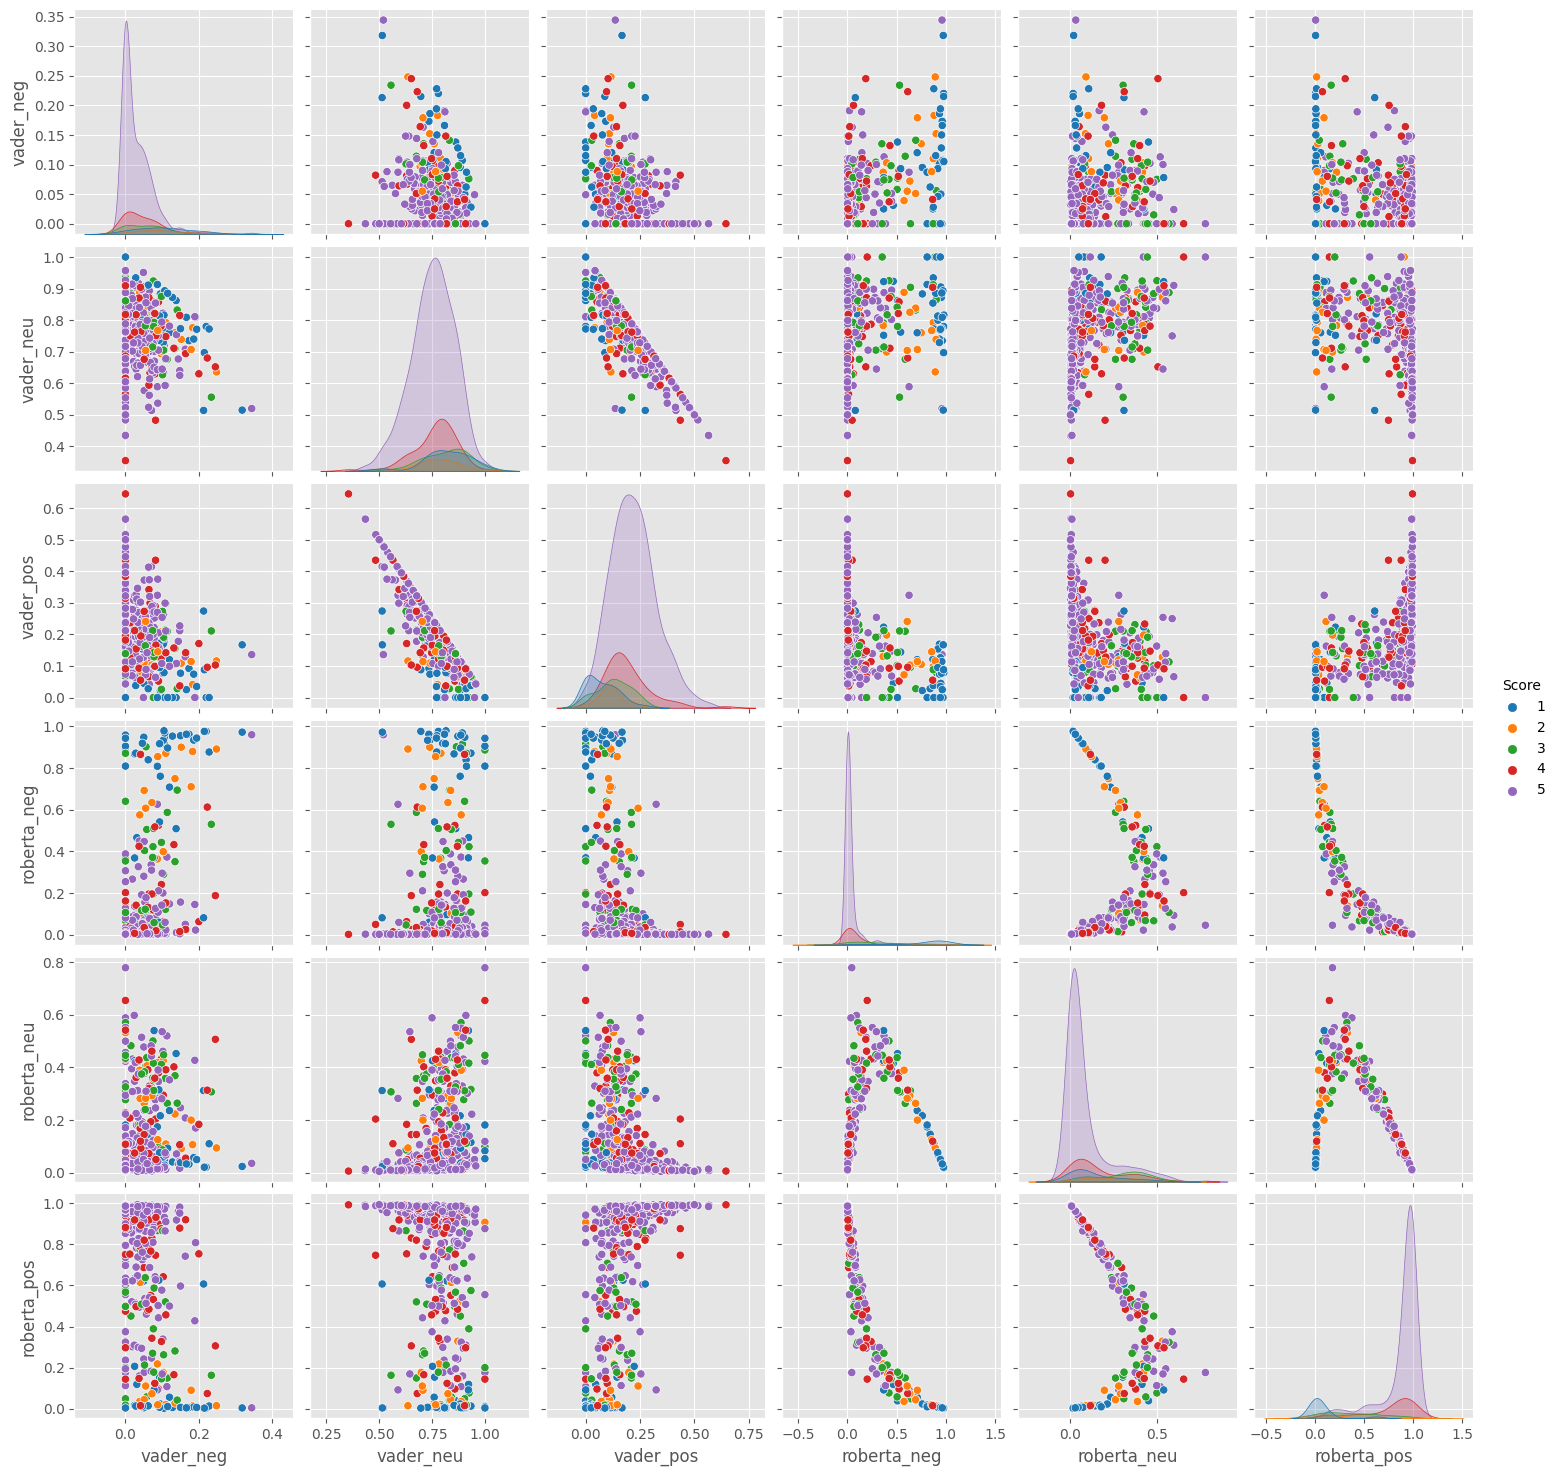

In [34]:
sns.pairplot(data = results_df,
            vars = ['vader_neg', 'vader_neu','vader_pos',
                   'roberta_neg', 'roberta_neu','roberta_pos'],
            hue = 'Score',
             palette = 'tab10'
            )
plt.show()

In [56]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [57]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [59]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [58]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'